In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv', index_col=0, parse_dates=True)

In [3]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.000000,7.000000,5.300000,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.000000,6.666667,5.200000,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.000000,6.333333,5.100000,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.000000,6.000000,5.000000,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.000000,5.666667,4.900000,47.666667
...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,22.733333,755.2,55.666667,3.333333,13.333333,23.666667
2016-05-27 17:30:00,90,0,22.600000,755.2,56.000000,3.500000,13.300000,24.500000
2016-05-27 17:40:00,270,10,22.466667,755.2,56.333333,3.666667,13.266667,25.333333


In [4]:
df=df.resample('1H').mean()

In [5]:
df

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,13.475000,21.583333
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,13.258333,21.833333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,13.283333,22.583333


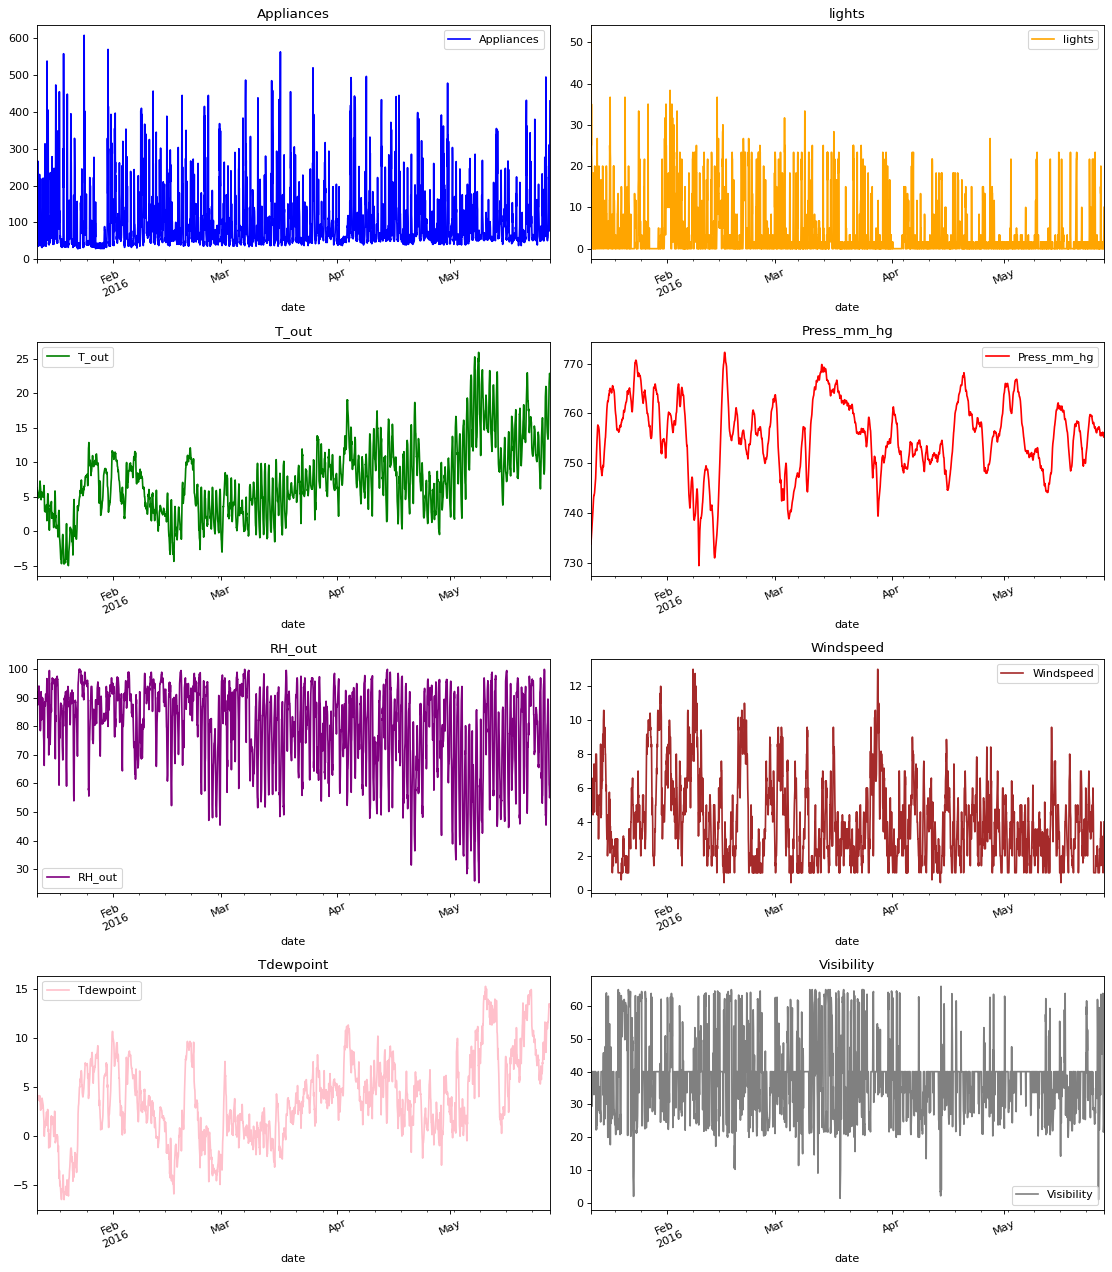

In [6]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

Null Hypothesis - Series possesses a unit root and hence is not stationary

Alternate Hypothesis - Series is stationary

In [7]:
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1] > 0.05 :
    print('{} - Series is not Stationary'.format(df.columns[i]))
  else:
    print('{} - Series is Stationary'.format(df.columns[i]))

Appliances - Series is Stationary
lights - Series is Stationary
T_out - Series is Stationary
Press_mm_hg - Series is Stationary
RH_out - Series is Stationary
Windspeed - Series is Stationary
Tdewpoint - Series is Stationary
Visibility - Series is Stationary


 H0: Xt does not granger causes Yt
 
 H1: Xt granger causes Yt

In [8]:
max_lags=8
y='Appliances'

In [9]:
for i in range(len(df.columns)-1):
  results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
  p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
  print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

Column - lights : P_Values - [0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]
Column - T_out : P_Values - [0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Press_mm_hg : P_Values - [0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]
Column - RH_out : P_Values - [0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
Column - Windspeed : P_Values - [0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]
Column - Tdewpoint : P_Values - [0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]
Column - Visibility : P_Values - [0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]


In [49]:
df_input=df

In [50]:
df_input

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000
...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,101.666667,1.666667,21.916667,755.800000,59.000000,2.000000,13.475000,21.583333
2016-05-27 15:00:00,76.666667,0.000000,22.216667,755.675000,57.333333,2.000000,13.258333,21.833333
2016-05-27 16:00:00,135.000000,0.000000,22.883333,755.375000,55.000000,2.416667,13.283333,22.583333


In [51]:
df_train = df_input[:int(0.95*(len(df_input)))]
df_test = df_input[int(0.95*(len(df_input))):]

In [52]:
df_train.shape

(3125, 8)

In [53]:
df_test.shape

(165, 8)

In [56]:
df_test.head()

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-05-20 22:00:00,53.333333,1.666667,13.375000,758.300000,84.833333,1.000000,10.841667,40.000000
2016-05-20 23:00:00,45.000000,0.000000,13.575000,758.175000,88.083333,1.416667,11.608333,35.416667
2016-05-21 00:00:00,48.333333,0.000000,14.100000,757.875000,91.000000,2.416667,12.641667,28.583333
2016-05-21 01:00:00,51.666667,0.000000,14.183333,757.491667,90.583333,3.416667,12.658333,33.000000
2016-05-21 02:00:00,56.666667,0.000000,14.216667,757.075000,90.416667,4.000000,12.600000,40.000000


In [57]:
exo = ['Press_mm_hg',	'RH_out',	'Windspeed',	'Tdewpoint',	'Visibility']

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d79bead4e9192d7fe2470a7936e4623e9ff252e1)

![link text](https://wikimedia.org/api/rest_v1/media/math/render/svg/d88ac4002c0641b2e93fb6d35f961ea63352b6a9)

In [58]:
model = VAR(df_train.drop(exo, axis=1), freq="1H")
for i in range(48):
    results = model.fit(i+1)
    print('Order = ', i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

Order =  1
AIC:  11.009895612793347
BIC:  11.033123024487173
Order =  2
AIC:  10.08294021193501
BIC:  10.123599045269287
Order =  3
AIC:  10.027453331872891
BIC:  10.08555290683518
Order =  4
AIC:  9.98305154681972
BIC:  10.058601191468409
Order =  5
AIC:  9.949628235016243
BIC:  10.042637285490144
Order =  6
AIC:  9.932921265980752
BIC:  10.043399066508693
Order =  7
AIC:  9.903876421557051
BIC:  10.031832324467496
Order =  8
AIC:  9.894001750843563
BIC:  10.03944511657425
Order =  9
AIC:  9.876781367779083
BIC:  10.03972156488666
Order =  10
AIC:  9.871185168153296
BIC:  10.051631573322991
Order =  11
AIC:  9.836146862293342
BIC:  10.034108860348635
Order =  12
AIC:  9.82582953263627
BIC:  10.04131651654858
Order =  13
AIC:  9.807856475417053
BIC:  10.040877846315444
Order =  14
AIC:  9.800895876695133
BIC:  10.051461043876039
Order =  15
AIC:  9.792431335167526
BIC:  10.060549716104475
Order =  16
AIC:  9.782361099977205
BIC:  10.068042120330578
Order =  17
AIC:  9.781012339792706
B

In [59]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,15.81,15.81,7.328e+06,15.81
1,11.00,11.03,6.004e+04,11.01
2,10.08,10.12,2.392e+04,10.10
3,10.03,10.09,2.267e+04,10.05
4,9.988,10.06,2.176e+04,10.02
5,9.953,10.05,2.102e+04,9.987
6,9.939,10.05,2.073e+04,9.980
7,9.910,10.04*,2.014e+04,9.957
8,9.899,10.05,1.991e+04,9.952
9,9.882,10.05,1.957e+04,9.941


In [62]:
model = VAR(df_train.drop(exo, axis=1), freq="1H")
results = model.fit(7)

In [63]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Nov, 2022
Time:                     08:13:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.0318
Nobs:                     3118.00    HQIC:                   9.94981
Log likelihood:          -28646.9    FPE:                    20007.8
AIC:                      9.90388    Det(Omega_mle):         19590.2
--------------------------------------------------------------------
Results for equation Appliances
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                41.661393         2.995758           13.907           0.000
L1.Appliances         0.439848         0.018278           24.064           0.000
L1.lights             0.696256         0.246073        

In [64]:
lag=results.k_ar
lag

7

In [65]:
forecasts = pd.DataFrame(results.forecast(df_train.drop(exo, axis=1).values[-lag:],steps=len(df_test)), columns = df_train.drop(exo, axis=1).columns)
forecasts.index = df_test.drop(exo,axis=1).index
forecasts.head(10)

,Appliances,lights,T_out
date,,,
2016-05-20 22:00:00,83.425828,3.156647,13.374452
2016-05-20 23:00:00,86.581360,3.880389,12.316110
2016-05-21 00:00:00,84.222173,4.140675,11.468687
2016-05-21 01:00:00,79.497345,3.990606,10.867969
2016-05-21 02:00:00,69.429422,3.127426,10.490263
2016-05-21 03:00:00,60.697795,2.377070,10.338420
2016-05-21 04:00:00,58.988661,1.921119,10.363661
2016-05-21 05:00:00,61.000718,1.615213,10.439277
2016-05-21 06:00:00,65.002695,1.496002,10.523727


In [66]:
len(forecasts)

165

In [67]:
df_test.head()

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-05-20 22:00:00,53.333333,1.666667,13.375000,758.300000,84.833333,1.000000,10.841667,40.000000
2016-05-20 23:00:00,45.000000,0.000000,13.575000,758.175000,88.083333,1.416667,11.608333,35.416667
2016-05-21 00:00:00,48.333333,0.000000,14.100000,757.875000,91.000000,2.416667,12.641667,28.583333
2016-05-21 01:00:00,51.666667,0.000000,14.183333,757.491667,90.583333,3.416667,12.658333,33.000000
2016-05-21 02:00:00,56.666667,0.000000,14.216667,757.075000,90.416667,4.000000,12.600000,40.000000


In [68]:
predictions = pd.DataFrame()
predictions['actual'] = df_test['Appliances']
predictions['VAR'] = forecasts['Appliances']
predictions.head()

,actual,VAR
date,,
2016-05-20 22:00:00,53.333333,83.425828
2016-05-20 23:00:00,45.000000,86.581360
2016-05-21 00:00:00,48.333333,84.222173
2016-05-21 01:00:00,51.666667,79.497345
2016-05-21 02:00:00,56.666667,69.429422


In [69]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [70]:
model2 = VARMAX(df_train.drop(exo, axis=1), exog = df_train[exo])

In [72]:
model_fit2 = model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [73]:
y_hat = model_fit2.forecast(steps = len(df_test), exog = df_test[exo])

In [74]:
y_hat.index = df_test.index

In [75]:
predictions['VARMAX'] = y_hat['Appliances']
predictions.head()

,actual,VAR,VARMAX
date,,,
2016-05-20 22:00:00,53.333333,83.425828,68.452538
2016-05-20 23:00:00,45.000000,86.581360,69.248979
2016-05-21 00:00:00,48.333333,84.222173,69.195134
2016-05-21 01:00:00,51.666667,79.497345,70.816767
2016-05-21 02:00:00,56.666667,69.429422,72.912594


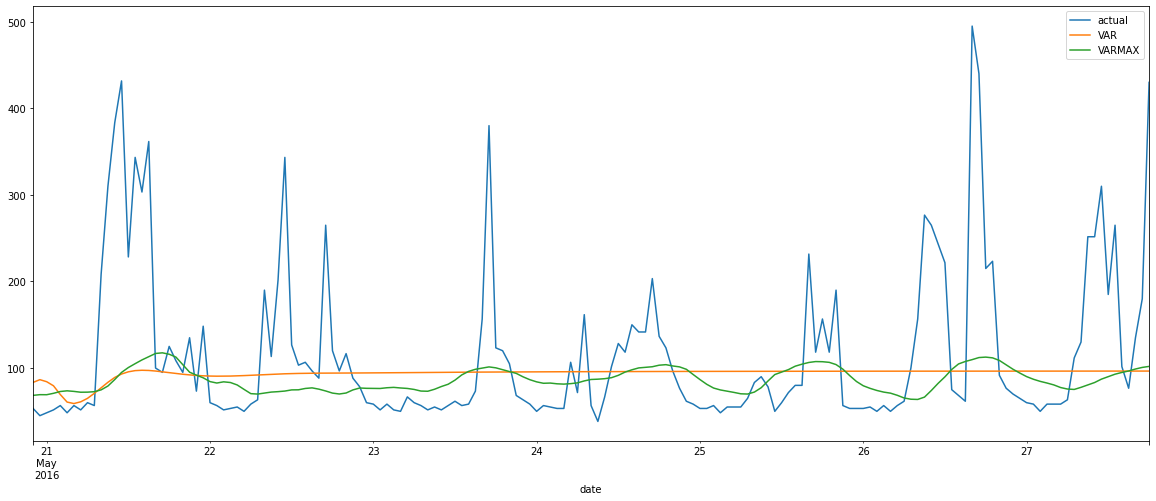

In [78]:
predictions.plot(figsize = (20,8))

In [ ]:
df_test[0:5]

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000


In [ ]:
df_coeff=pd.DataFrame([results.params['Appliances'],results.pvalues['Appliances']]).T

In [ ]:
df_coeff

,Appliances,Appliances
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [ ]:
df_coeff.columns = ['coeff','pval']

In [ ]:
df_coeff.query('pval < 0.05')
np.where(df_coeff['pval'] < 0.05,1, 0)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
df_coeff['valid']=np.where(df_coeff['pval'] < 0.05,1, 0)

In [ ]:
df_coeff

,coeff,pval,valid
const,37.865935,4.701032e-28,1
L1.Appliances,0.451436,6.138160e-132,1
L1.T_out,2.328238,3.582355e-01,0
L1.Windspeed,2.268735,2.564126e-01,0
L2.Appliances,0.222279,4.255512e-28,1
L2.T_out,-4.372626,4.302427e-01,0
L2.Windspeed,-1.481847,6.603327e-01,0
L3.Appliances,-0.019489,3.454670e-01,0
L3.T_out,5.606923,3.952787e-01,0
L3.Windspeed,0.184615,9.598961e-01,0


In [ ]:
#coeff_arr=np.multiply(df_coeff['coeff'], df_coeff['valid'])[1:].values
coeff_arr=df_coeff['coeff'][1:].values

In [ ]:
coeff_arr.shape

(21,)

In [ ]:
coeff_arr

array([ 0.45143647,  2.32823846,  2.26873466,  0.2222793 , -4.37262576,
       -1.48184722, -0.01948858,  5.60692324,  0.18461514, -0.04369054,
       -5.43530357, -0.08685622,  0.00738616,  5.17191268, -1.99030973,
       -0.01683822,  3.22703425,  4.97164661, -0.01091878, -6.77733848,
       -2.97259279])

In [ ]:
df_train[-lag:]

,Appliances,T_out,Windspeed
date,,,
2016-05-13 19:00:00,208.333333,19.333333,9.000000
2016-05-13 20:00:00,120.000000,17.066667,8.166667
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 23:00:00,61.666667,10.466667,7.583333
2016-05-14 00:00:00,58.333333,9.791667,5.750000
2016-05-14 01:00:00,63.333333,9.333333,4.000000


In [ ]:
in_arr=df_train[-lag:][::-1].stack().to_frame().T.values

In [ ]:
in_arr.shape

(1, 21)

In [ ]:
in_arr

array([[ 63.33333333,   9.33333333,   4.        ,  58.33333333,
          9.79166667,   5.75      ,  61.66666667,  10.46666667,
          7.58333333,  55.        ,  11.85      ,   6.83333333,
         63.33333333,  14.11666667,   6.58333333, 120.        ,
         17.06666667,   8.16666667, 208.33333333,  19.33333333,
          9.        ]])

In [ ]:
np.dot(in_arr, coeff_arr)+df_coeff['coeff'][:1].values

array([44.34598018])